# Prepare training and validation set
Validation set is required to debug the whole training process. Besides, for Kaggle competitions, validation set is used to estimate the model performance on the test set before submission.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

## get the full training set

In [3]:
train_df = pd.read_csv('datasets/train.csv')
print(train_df.shape)
display(train_df.head())

(666615, 4)


,itemid,title,Category,image_path
0,307504,nyx sex bomb pallete natural palette,0,beauty_image/6b2e9cbb279ac95703348368aa65da09.jpg
1,461203,etude house precious mineral any cushion pearl...,1,beauty_image/20450222d857c9571ba8fa23bdedc8c9.jpg
2,3592295,milani rose powder blush,2,beauty_image/6a5962bed605a3dd6604ca3a4278a4f9.jpg
3,4460167,etude house baby sweet sugar powder,3,beauty_image/56987ae186e8a8e71fcc5a261ca485da.jpg
4,5853995,bedak revlon color stay aqua mineral make up,3,beauty_image/9c6968066ebab57588c2f757a240d8b9.jpg


### prepare numeric labels for training set

In [6]:
uni_categories_df = train_df[['Category']].drop_duplicates().sort_values('Category', ascending=True).reset_index(drop=True)
uni_categories_df['category_label'] = uni_categories_df.index.values
train_df = train_df.merge(uni_categories_df, on='Category', how='left')

print(train_df.shape)
print(train_df[train_df.category_label.isnull()].shape)
print(train_df['category_label'].min())
print(train_df['category_label'].max())

(666615, 5)
(0, 5)
0
57


In [7]:
display(train_df.head())

,itemid,title,Category,image_path,category_label
0,307504,nyx sex bomb pallete natural palette,0,beauty_image/6b2e9cbb279ac95703348368aa65da09.jpg,0
1,461203,etude house precious mineral any cushion pearl...,1,beauty_image/20450222d857c9571ba8fa23bdedc8c9.jpg,1
2,3592295,milani rose powder blush,2,beauty_image/6a5962bed605a3dd6604ca3a4278a4f9.jpg,2
3,4460167,etude house baby sweet sugar powder,3,beauty_image/56987ae186e8a8e71fcc5a261ca485da.jpg,3
4,5853995,bedak revlon color stay aqua mineral make up,3,beauty_image/9c6968066ebab57588c2f757a240d8b9.jpg,3


### save the prepared training set

In [8]:
# train_df.to_csv('processed_data/dog_breed_train_full.csv', index=False)

## stratified sampling for validation set
stratified sampling is better than random sampling when the classes are imbalanced

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, random_state=25, test_size=0.1)

In [19]:
train_df = train_df.reset_index(drop=True)

for train_index, valid_index in sss.split(X=train_df.index.values, y=train_df['Category'].values):
    train_train_df, train_valid_df = train_df.iloc[train_index], train_df.iloc[valid_index]
    
train_train_df = train_train_df.reset_index(drop=True)
train_valid_df = train_valid_df.reset_index(drop=True)

print(train_train_df.shape)
print(train_valid_df.shape)
try:
    train_train_df.to_csv('processed_data/train_train.csv', index=False)
    print('[processed_data/train_train.csv] Saved')
except:
    pass
try:
    train_valid_df.to_csv('processed_data/train_val.csv', index=False)
    print('[processed_data/train_val.csv] Saved')
except:
    pass

(599953, 5)
(66662, 5)
[processed_data/train_train.csv] Saved
[processed_data/train_val.csv] Saved


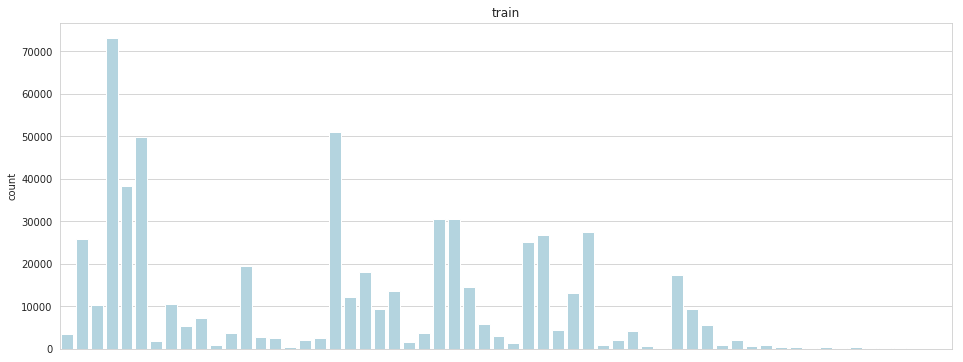

In [15]:
plt.figure(figsize=(16, 6))
sns.countplot(x=train_train_df['Category'].values, order=range(60), color='lightblue')
_ = plt.xticks([])
_ = plt.title('train')

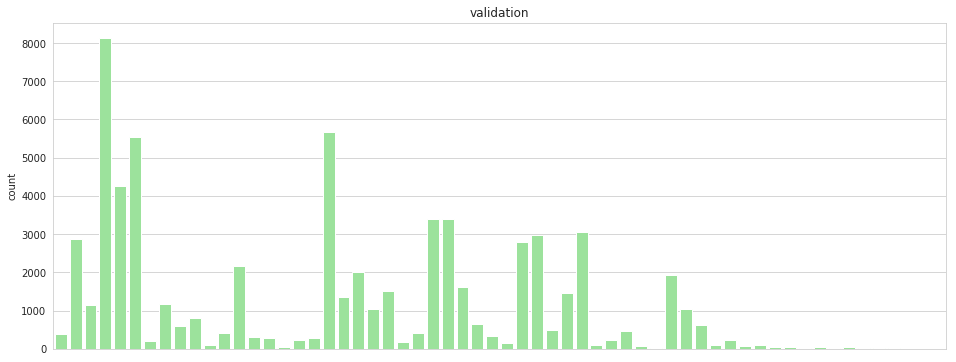

In [14]:
plt.figure(figsize=(16, 6))
sns.countplot(train_valid_df['Category'].values, order=range(60), color='lightgreen')
_ = plt.xticks([])
_ = plt.title('validation')

In [10]:
# train_train_df.to_csv('processed_data/train_train_dataset.csv', index=False)
# train_valid_df.to_csv('processed_data/train_valid_dataset.csv', index=False)

## prepare test dataset

In [21]:
sample_submission = pd.read_csv('datasets/data_info_val_sample_submission.csv')

print(sample_submission.shape)
display(sample_submission.head())

(172402, 2)


,itemid,Category
0,370855998,32
1,637234604,20
2,690282890,18
3,930913462,18
4,1039280071,11


In [12]:
test_df = sample_submission[['id']]
print(test_df.shape)
display(test_df.head())

(10357, 1)


,id
0,000621fb3cbb32d8935728e48679680e
1,00102ee9d8eb90812350685311fe5890
2,0012a730dfa437f5f3613fb75efcd4ce
3,001510bc8570bbeee98c8d80c8a95ec1
4,001a5f3114548acdefa3d4da05474c2e


In [13]:
# test_df.to_csv('processed_data/test_dataset.csv', index=False)

## check the final structure

In [14]:
! tree processed_data

processed_data
├── dog_breed_bn_incep_v3_lr_avg5.csv
├── dog_breed_train_full.csv
├── extra_train_dataset.csv
├── test_dataset.csv
├── test_submit_fe_adam_10epoch_simple_0.001.csv
├── train_train_dataset.csv
├── train_train_dataset_more.csv
└── train_valid_dataset.csv

0 directories, 8 files
